<a href="https://colab.research.google.com/github/SowmyaDontha88/Python/blob/main/cnn_cifar10_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

# **Loading Dataset**

The CIFAR10 dataset consists of 60000 32*32 colour images. The training and test data is split into 50000 and 10000 respectively. The test batch contains exactly 1000 randomly-selected images from each class. 



The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.These are the classes in the dataset:

1.Airplane
2.Automobile
3.Bird
4.Cat
5.Deer
6.Dog
7.Frog
8.Horse
9.Ship
10.Truck

There are 10 different classes in the dataset where each class is mutually exclusive.

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 11s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

Here we see there are 50000 training images and 1000 test images

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2D array, for our classification having 1D array is better for our model

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Let's plot some images to see what they are 

In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

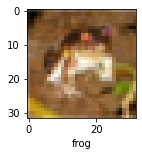

In [10]:
plot_sample(X_train, y_train, 0)

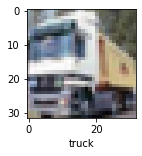

In [11]:
plot_sample(X_train, y_train, 1)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

<h4 style="color:purple">Normalizing the training data</h4>

In [12]:
X_train = X_train / 255.0
X_test = X_test / 255.0

# **Convolutional Neural Network**

Building the architecture / model of CNN

In [14]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [15]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 75s 46ms/step - loss: 1.5015 - accuracy: 0.4588
Epoch 2/10
1563/1563 [==============================] - 88s 56ms/step - loss: 1.1430 - accuracy: 0.5978
Epoch 3/10
1563/1563 [==============================] - 81s 52ms/step - loss: 1.0108 - accuracy: 0.6481
Epoch 4/10
1563/1563 [==============================] - 77s 50ms/step - loss: 0.9238 - accuracy: 0.6756
Epoch 5/10
1563/1563 [==============================] - 81s 52ms/step - loss: 0.8598 - accuracy: 0.7018
Epoch 6/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.8108 - accuracy: 0.7180
Epoch 7/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.7656 - accuracy: 0.7330
Epoch 8/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.7295 - accuracy: 0.7459
Epoch 9/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.6916 - accuracy: 0.7576
Epoch 10/10
1563/1563 [==============================] - 69s 44m

**The accuracy with CNN is found to be 76%.Using CNN , the computation is much less and maxpooling reduces the image dimensions while still preserving the features**

In [17]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 6s 17ms/step - loss: 0.9013 - accuracy: 0.7056


[0.9012604355812073, 0.7056000232696533]

In [18]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 5s 17ms/step


array([[2.99990788e-04, 1.51733375e-05, 3.02430999e-04, 9.52134430e-01,
        5.04566007e-04, 2.53010634e-02, 1.65909883e-02, 6.84427141e-05,
        4.77485824e-03, 8.07362994e-06],
       [3.90319340e-03, 9.56501439e-02, 1.77870879e-06, 6.07077845e-06,
        4.43831993e-07, 2.08823067e-07, 6.04599748e-08, 2.11963038e-06,
        8.95468175e-01, 4.96771187e-03],
       [1.29036948e-01, 1.12735681e-01, 1.27822496e-02, 2.02477407e-02,
        1.85163729e-02, 4.76235757e-03, 1.90050178e-03, 1.25367520e-02,
        6.63964987e-01, 2.35165022e-02],
       [7.16971278e-01, 1.06232166e-01, 3.64869907e-02, 2.30949689e-02,
        1.14128115e-02, 2.37443543e-04, 3.21309810e-04, 2.94650602e-03,
        1.01468027e-01, 8.28545133e-04],
       [7.88888030e-07, 5.80580354e-06, 5.89410868e-03, 1.45705612e-02,
        8.67848217e-01, 1.90433068e-03, 1.09666228e-01, 6.85058039e-05,
        2.42524197e-06, 3.90651985e-05]], dtype=float32)

In [19]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [20]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

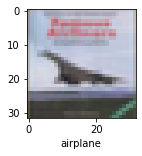

In [21]:
plot_sample(X_test, y_test,3)

In [22]:
classes[y_classes[3]]

'airplane'

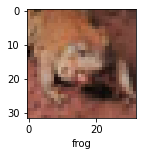

In [24]:
plot_sample(X_test, y_test,5)

In [25]:
classes[y_classes[5]]

'frog'

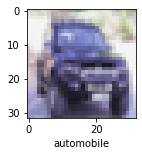

In [26]:
plot_sample(X_test, y_test,9)

In [28]:
classes[y_classes[9]]

'automobile'

From the above evaluation, we can say that the CNN model is correctly able to identify and classify the image.